# Clarans 
### (Clustering Large Applications based on RANdomized Search)

This method is very different from Clara. It uses the idea of graphs or networks, where each node is a combination of k medoids. To illustrate it, let us consider a data set with 10 datapoints:

Step 1. Select k=2 and create the network. In this case, the number of possible nodes is $10C_2$ and the nodes are represented by $(p_1, p_2)$, which can be any two points from the 10 points. The two points representing the nodes are the medoids. 

Graph construction:
A node in the graph has $k*(n-k)$ neighbors, where k is the number of medoids and $n$ is the total number of points. A neighbor is any node for which only one of the medoid changes. For example, let us consider node (1,2). The neighbors of this node are as follows:
<img src ='figures/k.n-k.PNG' width=400> 

Step 2. Each node is associated with a cost based on dissimilarity with all other objects and the medoid of its cluster.  

Step 3. Search for the best node with minimum cost for the whole graph. Basically, we are searching randomly through the whole graph for a node that leads to minimum cost, smaller than the previous medoid. The node/neighbor with the smallest cost becomes the next medoid or solution.  This is very computationally expensive, so sampling method is done by examining subgraphs.

Step 4. If a local optimum is found, the algorithm starts with a new randomly selected node in search for a new local optimum. The number of local optima to search is a parameter of the algorithm which we can think of as the iteration parameter.

The main advantage of this dataset is it maintains a balance between the computational cost and the influence of data sampling on clusters’ formation (CLARA). However, a huge disadvantage of this algorithm is as the size of the data set increases, it becomes computationally very expensive and difficult to implement.

References:
1. https://www.youtube.com/watch?v=q3plVFIgjGQ
2. https://analyticsindiamag.com/comprehensive-guide-to-clarans-clustering-algorithm/

### Implementation
We use the breast cancer dataset here. CLARANS algorithm can form separate clusters of the data points falling under one of the two target categories.

In [4]:
!pip install pyclustering

Defaulting to user installation because normal site-packages is not writeable


In [24]:
from pyclustering.cluster.clarans import clarans
from pyclustering.utils import timedcall
from sklearn import datasets
import pandas as pd

In [6]:
#import Breast Cancer dataset from sklearn library
bc_dataset =  datasets.load_breast_cancer()

In [30]:
bc_dataset
df = pd.DataFrame(bc_dataset.data, columns=bc_dataset.feature_names)
df['target'] = pd.Series(bc_dataset.target)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [33]:
#get the Breast Cancer data
bc_data = bc_dataset.data

In [34]:
bc_data.shape

(569, 30)

In [35]:
bc_data = bc_data.tolist()

#get a glimpse of dataset
print(bc_data[:5])

[[17.99, 10.38, 122.8, 1001.0, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.07871, 1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003, 0.006193, 25.38, 17.33, 184.6, 2019.0, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189], [20.57, 17.77, 132.9, 1326.0, 0.08474, 0.07864, 0.0869, 0.07017, 0.1812, 0.05667, 0.5435, 0.7339, 3.398, 74.08, 0.005225, 0.01308, 0.0186, 0.0134, 0.01389, 0.003532, 24.99, 23.41, 158.8, 1956.0, 0.1238, 0.1866, 0.2416, 0.186, 0.275, 0.08902], [19.69, 21.25, 130.0, 1203.0, 0.1096, 0.1599, 0.1974, 0.1279, 0.2069, 0.05999, 0.7456, 0.7869, 4.585, 94.03, 0.00615, 0.04006, 0.03832, 0.02058, 0.0225, 0.004571, 23.57, 25.53, 152.5, 1709.0, 0.1444, 0.4245, 0.4504, 0.243, 0.3613, 0.08758], [11.42, 20.38, 77.58, 386.1, 0.1425, 0.2839, 0.2414, 0.1052, 0.2597, 0.09744, 0.4956, 1.156, 3.445, 27.23, 0.00911, 0.07458, 0.05661, 0.01867, 0.05963, 0.009208, 14.91, 26.5, 98.87, 567.7, 0.2098, 0.8663, 0.6869, 0.2575, 0.6638, 0.173], [20.29, 14.34, 135.1, 1297.0, 0.1003

In [36]:
#clarans(self,data,number_clusters,numlocal,maxneighbor ) ... numlocal-num of iterations

clarans_obj = clarans(bc_data, 2, 3, 5)
clarans_obj

In [43]:
#calls the clarans method 'process' to implement the algortihm
(tks, res) = timedcall(clarans_obj.process);
print("Execution time : ", tks, "\n");

Execution time :  324.59407660737634 



List of allocated clusters, each cluster contains indexes of objects in list of data.

In [51]:
#returns the clusters 
clst = clarans_obj.get_clusters()
len(clst[1])

464

Returns list of medoids of allocated clusters.

In [45]:
#returns the mediods 
med = clarans_obj.get_medoids()
med

[0, 14]

In [46]:
print("Index of clusters' points :\n", clst)
print("\nLabel class of each point :\n ", bc_dataset.target)
print("\nIndex of the best medoids : ", med)

Index of clusters' points :
 [[0, 1, 2, 4, 6, 12, 18, 23, 24, 25, 27, 30, 32, 33, 42, 45, 53, 56, 70, 72, 77, 78, 82, 83, 85, 87, 95, 108, 121, 122, 127, 129, 134, 161, 162, 164, 168, 180, 181, 186, 198, 202, 210, 212, 218, 219, 233, 236, 237, 239, 244, 250, 252, 254, 256, 260, 264, 265, 272, 274, 280, 282, 300, 302, 317, 321, 323, 335, 337, 339, 343, 352, 365, 366, 368, 369, 372, 373, 389, 393, 400, 408, 417, 432, 433, 446, 449, 451, 460, 461, 468, 487, 492, 498, 499, 503, 516, 517, 521, 533, 535, 563, 564, 565, 567], [3, 5, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 19, 20, 21, 22, 26, 28, 29, 31, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 48, 49, 50, 51, 52, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 71, 73, 74, 75, 76, 79, 80, 81, 84, 86, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 123, 124, 125, 126, 128, 130, 131, 132, 133, 135, 136, 137, 138, 139, 140, 141, 142, 14

In [47]:
from pyclustering.cluster import cluster_visualizer_multidim

Cluster_visualizer class of the pyclustering library can be used to visualize the 1D, 2D or 3D data. 
While for more than three-dimensional data, cluster_visualizer_multidim class can be used

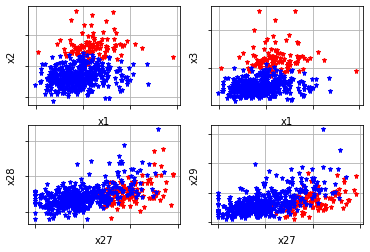

In [48]:
vis = cluster_visualizer_multidim();
vis.append_clusters(clst,bc_data,marker="*",markersize=5);
vis.show(pair_filter=[[1,2],[1,3],[27,28],[27,29]],max_row_size=2);

Compared to Clara, Clarans is more efficient and scalable  and returns clusters with higher quality.